In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')
#Librerias basicas para proyecciones
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pmdarima import auto_arima
import os
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
import warnings
warnings.filterwarnings('ignore')
import arch
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
plt.style.use("classic")
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
datos = pd.read_excel('base_datos_final_hh.xlsx')

In [3]:
datos.drop("ConsumoCombustibleFFijas", axis = 1, inplace = True )

In [4]:
index = pd.Index(sm.tsa.datetools.dates_from_range("2016M1", "2022M12"))    
datos.set_index(index, inplace=True)

In [5]:
datos.head()

,Unnamed: 0,ConsumoAguaM3,ConsumoEnergíaKWh,ConsumoPapelResmasMes,ConsumoCombustibleFMóviles
2016-01-31,2016-01-31,9258,520258.0,596.125148,10818.64
2016-02-29,2016-02-29,13633,525991.0,1007.105473,28693.32
2016-03-31,2016-03-31,16603,692349.0,830.000000,35695.96
2016-04-30,2016-04-30,17846,711904.0,2115.000000,44776.62
2016-05-31,2016-05-31,17274,755482.0,251.000000,31995.10


In [6]:
datos.tail()

,Unnamed: 0,ConsumoAguaM3,ConsumoEnergíaKWh,ConsumoPapelResmasMes,ConsumoCombustibleFMóviles
2022-08-31,2022-08-31,14962,599443.6,204.0,17292.932198
2022-09-30,2022-09-30,17862,714349.6,39.0,28996.572752
2022-10-31,2022-10-31,21897,704331.0,632.0,29131.706855
2022-11-30,2022-11-30,17880,734474.0,2360.0,29696.358471
2022-12-31,2022-12-31,19957,665531.0,52.0,10519.859338


In [7]:
datos["Fecha"] = datos.index

In [8]:
datos.drop("Unnamed: 0", axis = 1, inplace=True)

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2016-01-31 to 2022-12-31
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ConsumoAguaM3               84 non-null     int64         
 1   ConsumoEnergíaKWh           84 non-null     float64       
 2   ConsumoPapelResmasMes       84 non-null     float64       
 3   ConsumoCombustibleFMóviles  84 non-null     float64       
 4   Fecha                       84 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.9 KB


Agua 

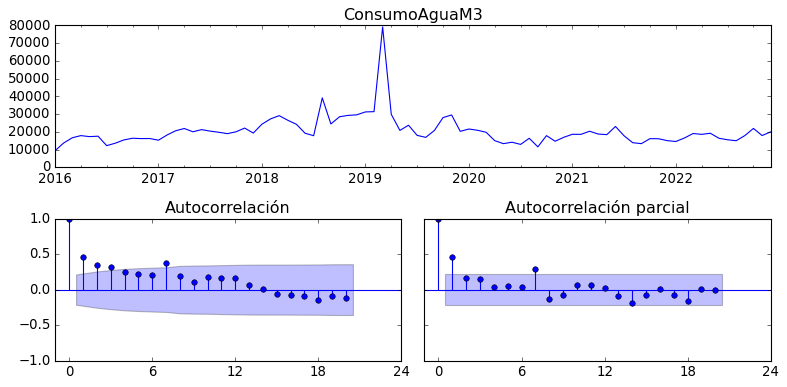

In [10]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

datos["ConsumoAguaM3"].plot(ax=ax,title='ConsumoAguaM3', legend=None)
sm.graphics.tsa.plot_acf(datos["ConsumoAguaM3"], ax=axs0, title='Autocorrelación')
sm.graphics.tsa.plot_pacf(datos["ConsumoAguaM3"], ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
plt.show()

In [11]:
def stationarityTest(series):
    adtestResult = adfuller(series.values)
    pValue = adtestResult[1]
    alpha = 0.05
    if pValue >= alpha:
        print(adtestResult)
        return "Esta serie no es estacionaria."
    else:
        print(adtestResult)
        return "Esta serie es estacionaria."

In [12]:
stationarityTest(datos["ConsumoAguaM3"])

(-5.5222623907603205, 1.866165338018131e-06, 0, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 1478.458499625812)


'Esta serie es estacionaria.'

In [13]:
pmax = 7
qmax = 7
P = np.arange(pmax+1)
Q = np.arange(qmax+1)

In [14]:
aic = [[sm.tsa.arima.ARIMA(datos["ConsumoAguaM3"] , order=[p,0,q]).fit().aic for q in Q ] for p in P ]
AIC = pd.DataFrame(aic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])

In [15]:
AIC

,q=0,q=1,q=2,q=3,q=4,q=5,q=6,q=7
p=0,1759.297628,1746.719834,1745.731346,1743.650217,1745.871623,1748.652373,1750.671951,1744.797294
p=1,1740.521594,1738.199846,1739.677752,1741.970326,1744.857122,1747.637317,1750.186318,1742.200449
p=2,1740.184628,1739.516520,1739.953602,1743.960496,1745.206364,1748.328834,1751.614750,1743.920331
p=3,1740.455415,1741.498961,1741.757881,1743.788464,1746.245927,1747.579082,1751.291577,1744.924250
p=4,1742.357341,1743.503811,1743.028298,1745.712212,1744.405779,1747.744556,1750.082405,1746.784048
p=5,1744.155891,1744.319836,1746.107101,1746.922186,1746.681519,1749.168001,1749.055636,1748.288977
p=6,1746.101210,1746.374431,1747.637499,1748.470909,1749.404629,1750.969355,1749.555402,1749.800374
p=7,1740.429619,1741.683227,1742.928432,1743.304686,1745.340844,1748.145624,1750.302133,1751.114034


In [16]:
p = 1
q = 1

In [17]:
modelo = sm.tsa.arima.ARIMA(datos["ConsumoAguaM3"], order=(p, 0, q))
modelofit = modelo.fit()
print(modelofit.summary())
sss = modelofit.summary()

                               SARIMAX Results                                
Dep. Variable:          ConsumoAguaM3   No. Observations:                   84
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -865.100
Date:                Sun, 24 Dec 2023   AIC                           1738.200
Time:                        14:28:57   BIC                           1747.923
Sample:                    01-31-2016   HQIC                          1742.109
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.029e+04   3823.653      5.306      0.000    1.28e+04    2.78e+04
ar.L1          0.8566      0.111      7.734      0.000       0.640       1.074
ma.L1         -0.5538      0.164     -3.378      0.0

In [18]:
one_step_predictions = []
for i in range(48):
  model = sm.tsa.statespace.SARIMAX(datos['ConsumoAguaM3'],
                         order=(1, 0, 1),
                         seasonal_order=(1,0,1, 12),
                         enforce_stationarity=False,
                         enforce_invertibility=False)
  result = model.fit()

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      ConsumoAguaM3   No. Observations:                   84
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -725.114
Date:                            Sun, 24 Dec 2023   AIC                           1460.229
Time:                                    14:29:00   BIC                           1471.471
Sample:                                01-31-2016   HQIC                          1464.694
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9698      0.029     33.564      0.000       0.913       1.026
ma.L1         -0.7331      0.083     -8.850      0.000      -0.895      -0.571
ar.S.L12       0.8532      0.219      3.896      0.000       0.424       1.282
ma.S.L12      -0.7813      0.287     -2.720      0.007      -1.344      -0.218
sigma2      5.947e+07   1.94e-08   3.07e+15      0.000    5.95e+07    5.95e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              1421.96
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             3.44
Prob(H) (two-sided):                  0.01   Kurtosis:                        23.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.61e+31. Standard errors may be unstable.
"""

In [20]:
residuos = pd.DataFrame()
residuos["Ut"] = modelofit.resid

Text(0.5, 1.0, 'Raíces inversas del polinomio autorregresivo')

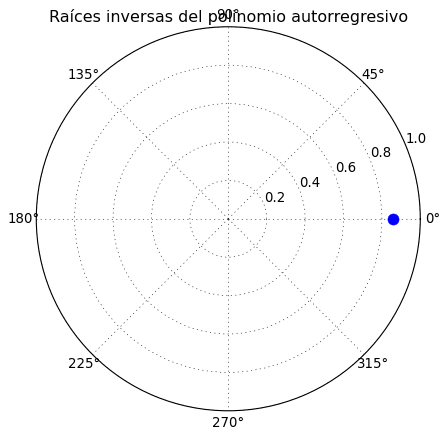

In [21]:
arroots = 1/modelofit.arroots

plt.polar(np.angle(arroots), np.abs(arroots), '.', ms=20)
fig = plt.gcf()
ax = fig.gca()
ax.set_rlim([0,1])
ax.set_title('Raíces inversas del polinomio autorregresivo')

In [22]:
stationarityTest(modelofit.resid)

(-8.78347175658814, 2.3424803241332196e-14, 0, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 1475.2840357314324)


'Esta serie es estacionaria.'

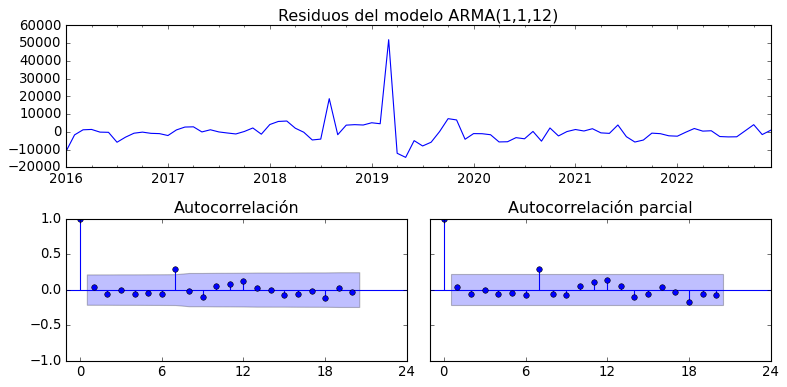

In [23]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

modelofit.resid.plot(ax=ax, title='Residuos del modelo ARMA(1,1,12)', legend=None)
sm.graphics.tsa.plot_acf(modelofit.resid, ax=axs0, title='Autocorrelación')
sm.graphics.tsa.plot_pacf(modelofit.resid, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
plt.show()

In [24]:
sm.stats.acorr_ljungbox(modelofit.resid, lags = [32], return_df = True)

,lb_stat,lb_pvalue
32,19.438266,0.960339


<Axes: xlabel='Ut', ylabel='Count'>

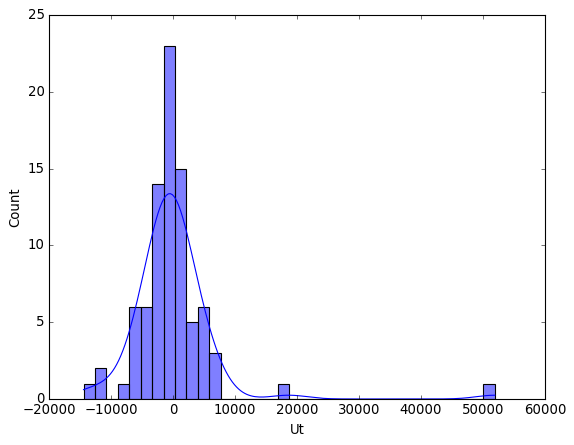

In [25]:
sns.histplot(data = residuos, x = "Ut", kde = True)

In [26]:
JB_pv = sm.stats.stattools.jarque_bera(modelofit.resid, axis=0)[1]
print("El p-value de prueba JB es ", JB_pv)

El p-value de prueba JB es  0.0


In [27]:
Anderson_Empirico = sm.stats.diagnostic.anderson_statistic(modelofit.resid, dist='norm', fit=True, params=(), axis=0)
print("El p-value de la prueba de A-D es ", Anderson_Empirico)

El p-value de la prueba de A-D es  6.50024088144049


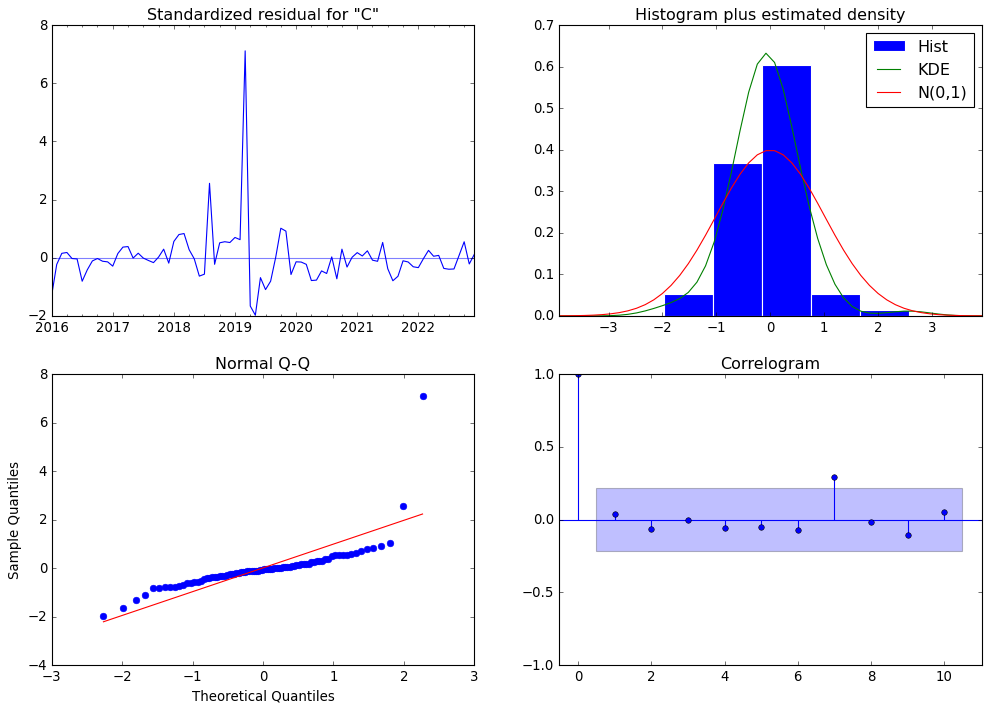

In [28]:
overallgraph = modelofit.plot_diagnostics(figsize=(15,10))

In [29]:
fitted_values = modelofit.fittedvalues

In [30]:
forecast_arima = modelofit.forecast(12)

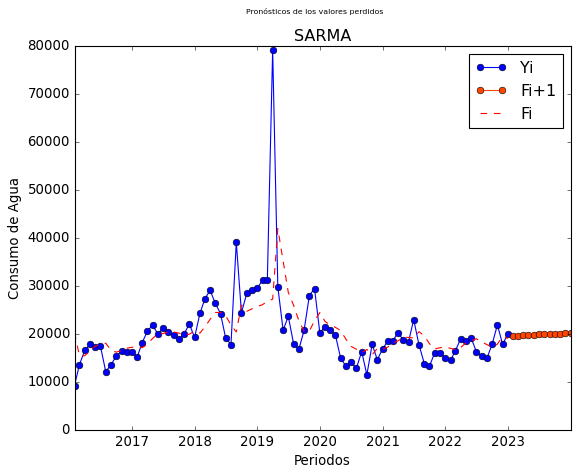

In [31]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('Pronósticos de los valores perdidos', fontsize =7)

ax1.plot(datos.index,
         datos["ConsumoAguaM3"],
         '-o',  color = 'blue', label = 'Yi')
ax1.plot(forecast_arima,'-o',  color = 'orangered', label = 'Fi+1' )
ax1.plot(fitted_values,'--',  color = 'red', label = 'Fi' )
ax1.set(xlabel= 'Periodos', ylabel= 'Consumo de Agua')
ax1.set_title('SARMA')
ax1.legend(loc='best')

plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluar_predicciones(y_reales, y_predichos):
    """
    Evalúa las predicciones comparándolas con los valores reales.

    Parameters:
    - y_reales: Lista o array de los valores reales.
    - y_predichos: Lista o array de los valores predichos.

    Returns:
    - mse: Mean Squared Error (MSE).
    - rmse: Root Mean Squared Error (RMSE).
    - mae: Mean Absolute Error (MAE).
    - theil_u: Theil U statistic.
    """
    # Calcular las métricas
    mse = mean_squared_error(y_reales, y_predichos)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_reales, y_predichos)

    # Calcular Theil U
    theil_u = np.sqrt(np.mean((y_predichos - y_reales)**2) / np.mean(y_reales**2))

    return mse, rmse, mae, theil_u

In [33]:
evaluar_predicciones(datos["ConsumoAguaM3"],fitted_values)

(51728646.138126306,
 7192.262935830858,
 3652.9264002196237,
 0.32789151028851066)

In [34]:
residuos = pd.DataFrame()
residuos["Ut"] = result.resid

Text(0.5, 1.0, 'Raíces inversas del polinomio autorregresivo')

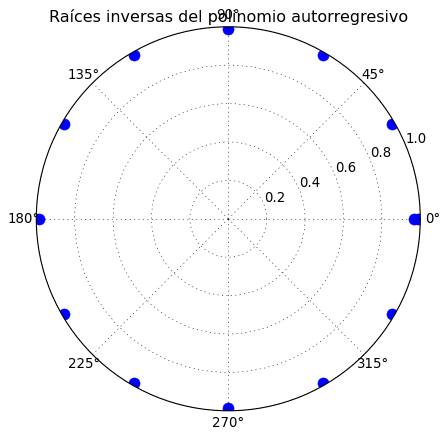

In [35]:
arroots = 1/result.arroots

plt.polar(np.angle(arroots), np.abs(arroots), '.', ms=20)
fig = plt.gcf()
ax = fig.gca()
ax.set_rlim([0,1])
ax.set_title('Raíces inversas del polinomio autorregresivo')

In [36]:
stationarityTest(result.resid)

(-8.222404435159952, 6.377413710113841e-13, 0, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 1473.5062405972624)


'Esta serie es estacionaria.'

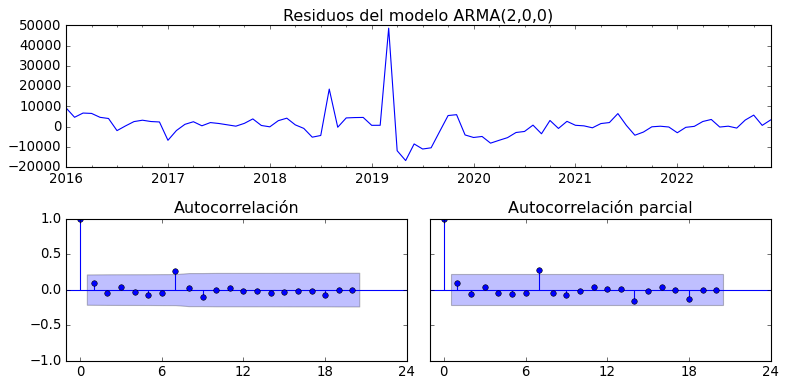

In [37]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

result.resid.plot(ax=ax, title='Residuos del modelo ARMA(2,0,0)', legend=None)
sm.graphics.tsa.plot_acf(result.resid, ax=axs0, title='Autocorrelación')
sm.graphics.tsa.plot_pacf(result.resid, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
plt.show()

In [38]:
sm.stats.acorr_ljungbox(result.resid, lags = [32], return_df = True)

,lb_stat,lb_pvalue
32,14.958552,0.995508


<Axes: xlabel='Ut', ylabel='Count'>

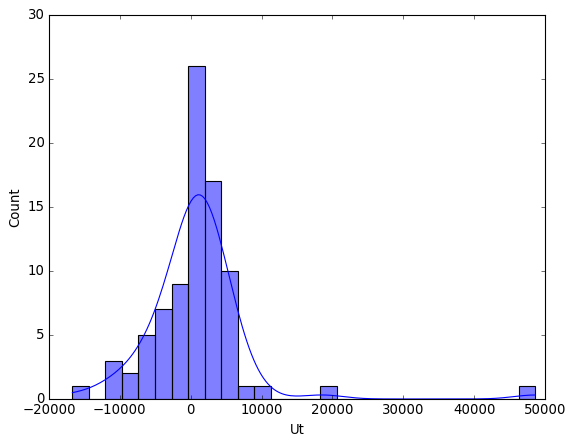

In [39]:
sns.histplot(data = residuos, x = "Ut", kde = True)

In [40]:
JB_pv = sm.stats.stattools.jarque_bera(result.resid, axis=0)[1]
print("El p-value de prueba JB es ", JB_pv)

El p-value de prueba JB es  0.0


In [41]:
Anderson_Empirico = sm.stats.diagnostic.anderson_statistic(result.resid, dist='norm', fit=True, params=(), axis=0)
print("El p-value de la prueba de A-D es ", Anderson_Empirico)

El p-value de la prueba de A-D es  4.766274498042478


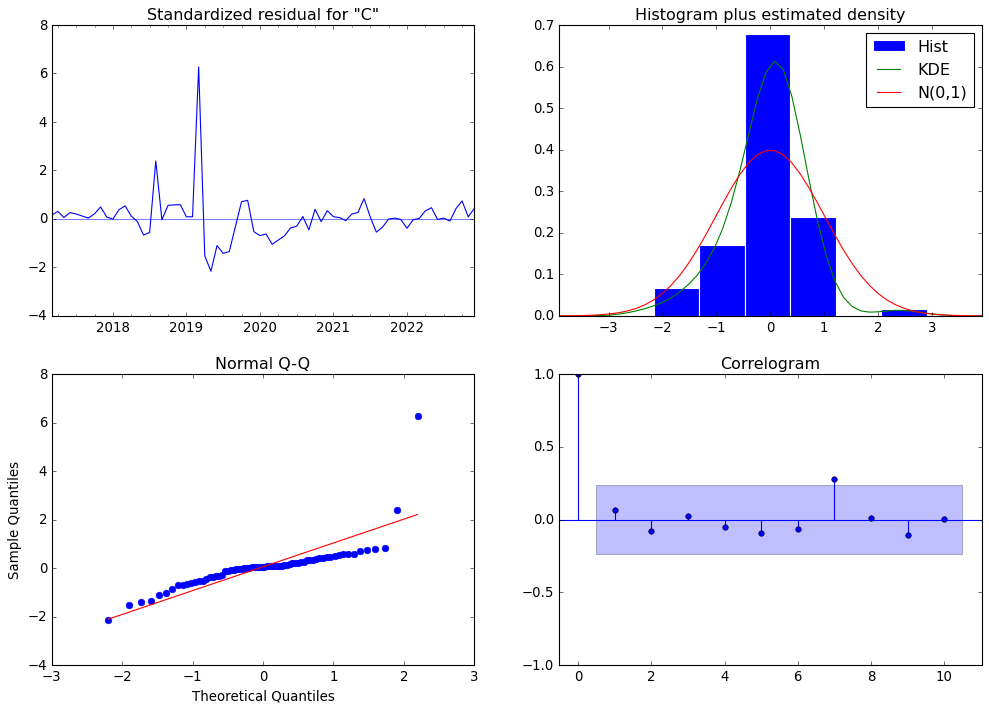

In [42]:
overallgraph = result.plot_diagnostics(figsize=(15,10))

In [43]:
fitted_values = result.fittedvalues


In [44]:
forecast_arima = result.forecast(12)


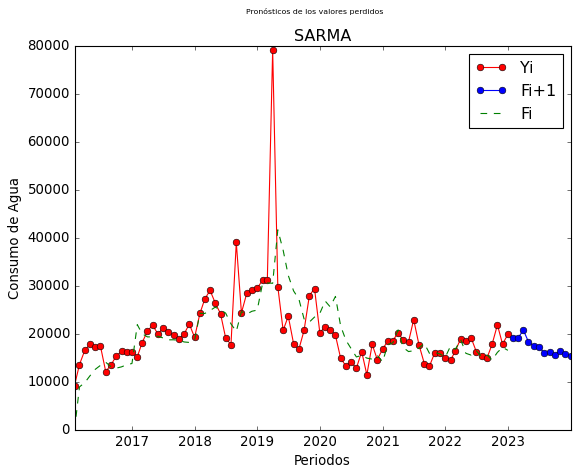

In [45]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('Pronósticos de los valores perdidos', fontsize =7)

ax1.plot(datos.index,
         datos["ConsumoAguaM3"],'-o',  color = 'red', label = 'Yi' )
ax1.plot(forecast_arima,'-o',  color = 'blue', label = 'Fi+1' )
ax1.plot(fitted_values,'--',  color = 'green', label = 'Fi' )
ax1.set(xlabel= 'Periodos', ylabel= 'Consumo de Agua')
ax1.set_title('SARMA')
ax1.legend(loc='best')

plt.show()

In [46]:
evaluar_predicciones(datos["ConsumoAguaM3"],fitted_values)

(52281078.295979045, 7230.565558514703, 4039.6088794035527, 0.3296377068488796)